Here, we will first try to find clusters in E Coli transmembrane transport proteins with ProtNLM encoding and KNN.

## Dataset creation:

In [22]:
from subpred.util import load_df

sequences70 = load_df("uniprot70")
sequences70.head()

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
A1L190,SYCE3 C22orf41 THEG2,Synaptonemal complex central element protein 3...,True,1,MDDADPEERNYDNMLKMLSDLNKDLEKLLEEMEKISVQATWMAYDM...,9606
A1X283,SH3PXD2B FAD49 KIAA1295 TKS4,SH3 and PX domain-containing protein 2B (Adapt...,True,1,MPPRRSIVEVKVLDVQKRRVPNKHYVYIIRVTWSSGSTEAIYRRYS...,9606


Filtering

- Organism E Coli K 12

In [23]:
sequences70_ecoli = sequences70[sequences70.organism_id == 83333]
sequences70_ecoli

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


Get annotations that are descendants of transmembrane transporter activity:

In [24]:
from subpred.ontology import GeneOntology, GO_FILE

go = GeneOntology(GO_FILE)
go_ids_transmembrane_transporters = go.get_descendants(go.get_identifier("transmembrane transporter activity"))

Load GO annotations:

In [31]:
goa_uniprot = load_df("go")

goa_uniprot

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


Load embeddings from Uniprot:

In [26]:
import h5py
import pandas as pd
import numpy as np

def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


In [27]:
embeddings_ecoli = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")

Idea: Use Swissprot embeddings to search labels, apply that to Uniprot!

Get all proteins in Uniprot annotated directly with transmembrane transporter go term

In [40]:
goa_uniprot_transmembrane_transporters = goa_uniprot[goa_uniprot.go_id.isin(go_ids_transmembrane_transporters)]
goa_uniprot_transmembrane_transporters = goa_uniprot_transmembrane_transporters[goa_uniprot_transmembrane_transporters.qualifier == "enables"]
proteins_transmembrane_transport = goa_uniprot_transmembrane_transporters.Uniprot.to_numpy()
len(proteins_transmembrane_transport)

92772

In [44]:
sequences70_ecoli_transmembrane_transport = sequences70_ecoli[sequences70_ecoli.index.isin(proteins_transmembrane_transport)]

sequences70_ecoli_transmembrane_transport

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P38055,ydjE b1769 JW1758,Inner membrane metabolite transport protein YdjE,True,1,MEQYDQIGARLDRLPLARFHYRIFGIISFSLLLTGFLSYSGNVVLA...,83333
P39282,yjeM b4156 JW5739,Inner membrane transporter YjeM,True,1,MPHTIKKMSLIGLILMIFTSVFGFANSPSAYYLMGYSAIPFYIFSA...,83333
P76197,ydiM b1690 JW1680,Inner membrane transport protein YdiM,True,1,MKNPYFPTALGLYFNYLVHGMGVLLMSLNMASLETLWQTNAAGVSI...,83333


In [46]:
sequences70_ecoli_tmtp_embeddings = embeddings_ecoli[embeddings_ecoli.index.isin(sequences70_ecoli_transmembrane_transport.index)]
sequences70_ecoli_tmtp_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A5A627,0.008194,-0.103149,0.095520,-0.004520,-0.008125,-0.036407,-0.015701,-0.189819,-0.098816,0.066406,...,-0.031204,0.045227,0.108948,-0.225952,-0.090393,0.058868,0.008751,0.040741,0.069641,-0.033081
P00393,0.047699,0.075073,0.036682,0.055328,0.005089,0.012367,-0.060516,-0.054138,0.051270,-0.002701,...,-0.014534,0.005798,0.001472,-0.062073,0.043121,-0.023956,-0.043457,0.012581,-0.044800,0.025131
P00550,0.033051,0.095581,0.051880,0.026596,0.009598,0.038483,-0.068481,-0.050018,0.050201,-0.025009,...,-0.029587,-0.005123,-0.007687,-0.038330,0.036346,-0.007164,-0.018311,0.025558,-0.027420,0.019791
P02916,0.010300,0.080383,0.056885,0.034698,0.031525,0.022995,-0.030945,-0.037567,0.042816,-0.010796,...,-0.024963,-0.022446,-0.000171,-0.046082,0.042053,-0.053955,-0.039642,-0.031525,-0.041718,0.017944
P02920,0.001245,0.070251,0.002447,0.029984,0.011215,0.013611,-0.030151,-0.043945,0.023453,-0.043488,...,-0.057526,-0.001541,-0.009628,-0.047943,0.045532,-0.001415,-0.003309,-0.026733,-0.001318,-0.008537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q47377,0.001175,0.024399,0.030151,0.023239,0.001207,-0.001466,0.007629,-0.061462,-0.019699,0.005932,...,-0.022156,-0.012550,-0.019348,-0.118103,-0.049683,-0.015854,-0.052948,-0.042572,0.011665,-0.026337
Q47537,0.027115,0.086182,0.036011,-0.008667,0.007534,-0.025223,-0.050537,-0.046387,0.059509,-0.014236,...,-0.047302,-0.015106,-0.013855,-0.020279,0.031281,-0.029938,-0.058105,-0.022888,-0.008263,0.024460
Q47706,0.013489,-0.050446,0.016495,0.011887,0.032074,-0.030472,0.029510,-0.027496,0.055206,0.004265,...,-0.009102,0.005558,-0.002340,-0.057678,0.029434,-0.001766,-0.024490,-0.020233,-0.014412,0.015114
Q59385,0.043854,0.060669,0.021042,0.057739,0.006348,0.012650,-0.038544,-0.069031,0.039948,-0.013977,...,-0.012306,-0.005459,-0.025864,-0.023331,0.031219,-0.048676,-0.040955,-0.001766,-0.057678,0.014343


## Cluster analysis

In [47]:
sequences70_ecoli_tmtp_embeddings

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A5A627,0.008194,-0.103149,0.095520,-0.004520,-0.008125,-0.036407,-0.015701,-0.189819,-0.098816,0.066406,...,-0.031204,0.045227,0.108948,-0.225952,-0.090393,0.058868,0.008751,0.040741,0.069641,-0.033081
P00393,0.047699,0.075073,0.036682,0.055328,0.005089,0.012367,-0.060516,-0.054138,0.051270,-0.002701,...,-0.014534,0.005798,0.001472,-0.062073,0.043121,-0.023956,-0.043457,0.012581,-0.044800,0.025131
P00550,0.033051,0.095581,0.051880,0.026596,0.009598,0.038483,-0.068481,-0.050018,0.050201,-0.025009,...,-0.029587,-0.005123,-0.007687,-0.038330,0.036346,-0.007164,-0.018311,0.025558,-0.027420,0.019791
P02916,0.010300,0.080383,0.056885,0.034698,0.031525,0.022995,-0.030945,-0.037567,0.042816,-0.010796,...,-0.024963,-0.022446,-0.000171,-0.046082,0.042053,-0.053955,-0.039642,-0.031525,-0.041718,0.017944
P02920,0.001245,0.070251,0.002447,0.029984,0.011215,0.013611,-0.030151,-0.043945,0.023453,-0.043488,...,-0.057526,-0.001541,-0.009628,-0.047943,0.045532,-0.001415,-0.003309,-0.026733,-0.001318,-0.008537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q47377,0.001175,0.024399,0.030151,0.023239,0.001207,-0.001466,0.007629,-0.061462,-0.019699,0.005932,...,-0.022156,-0.012550,-0.019348,-0.118103,-0.049683,-0.015854,-0.052948,-0.042572,0.011665,-0.026337
Q47537,0.027115,0.086182,0.036011,-0.008667,0.007534,-0.025223,-0.050537,-0.046387,0.059509,-0.014236,...,-0.047302,-0.015106,-0.013855,-0.020279,0.031281,-0.029938,-0.058105,-0.022888,-0.008263,0.024460
Q47706,0.013489,-0.050446,0.016495,0.011887,0.032074,-0.030472,0.029510,-0.027496,0.055206,0.004265,...,-0.009102,0.005558,-0.002340,-0.057678,0.029434,-0.001766,-0.024490,-0.020233,-0.014412,0.015114
Q59385,0.043854,0.060669,0.021042,0.057739,0.006348,0.012650,-0.038544,-0.069031,0.039948,-0.013977,...,-0.012306,-0.005459,-0.025864,-0.023331,0.031219,-0.048676,-0.040955,-0.001766,-0.057678,0.014343


Turning embeddings into TSNE:

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pipe_tsne = make_pipeline(StandardScaler(), PCA(50), TSNE(2))

embeddings_tsne = pipe_tsne.fit_transform(sequences70_ecoli_tmtp_embeddings)
embeddings_tsne = pd.DataFrame(embeddings_tsne, columns=["x","y"], index=sequences70_ecoli_tmtp_embeddings.index)

/home/ad/mambaforge/envs/subpred4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/ad/mambaforge/envs/subpred4/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='x', ylabel='y'>

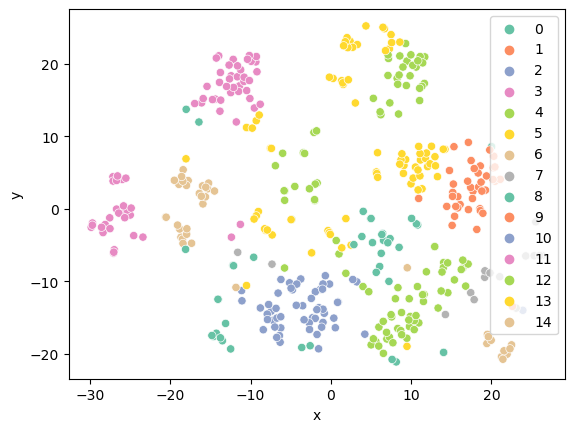

In [103]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pipe_cluster = make_pipeline(StandardScaler(), KMeans(n_clusters=15))
# kmeans = KMeans(n_clusters=8)

pipe_cluster.fit(sequences70_ecoli_tmtp_embeddings)

sns.scatterplot(data=embeddings_tsne, x="x", y="y", hue=pipe_cluster["kmeans"].labels_, palette="Set2")

In [78]:
# Elbow plot

# Silhouette plot

## Classification

In [85]:
goa_uniprot

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


In [98]:
def get_protein_set(go_term:str, enables_only:bool=True, remove_iea:bool=False):
    go_ids = go.get_descendants(go.get_identifier(go_term))
    mask = goa_uniprot.go_id.isin(go_ids)
    if enables_only:
        mask = mask & (goa_uniprot.qualifier == "enables")
    if remove_iea:
        mask = mask & (goa_uniprot.evidence_code != "IEA")
    return set(goa_uniprot[mask].Uniprot.unique())

In [99]:
get_protein_set("sugar transmembrane transporter activity", enables_only=True, remove_iea=False)

{'A0A060PNU2',
 'A0A060PNU6',
 'A0A060PPU5',
 'A0A060PPU9',
 'A0A060PVS3',
 'A0A060PVS9',
 'A0A060PWD4',
 'A0A068EZ21',
 'A0A072V086',
 'A0A076L2F5',
 'A0A077RF08',
 'A0A0A0KFB0',
 'A0A0A0KHI8',
 'A0A0A0KZ64',
 'A0A0A0L000',
 'A0A0A0LKS4',
 'A0A0A6Z9P5',
 'A0A0A8J7F2',
 'A0A0A8J7G3',
 'A0A0A8J8K5',
 'A0A0A8JCK7',
 'A0A0C4DH64',
 'A0A0D4L3Z9',
 'A0A0D4L4A4',
 'A0A0D4L4A9',
 'A0A0D4L5L6',
 'A0A0F7QD74',
 'A0A0G2JSJ3',
 'A0A0G2JT05',
 'A0A0G2JT43',
 'A0A0G2JVB0',
 'A0A0G2JW25',
 'A0A0G2K1J9',
 'A0A0G2K2S2',
 'A0A0H3YF36',
 'A0A0H3YJ48',
 'A0A0N7D5T9',
 'A0A0N9M5V7',
 'A0A0P0XK00',
 'A0A0R4J067',
 'A0A140H1A1',
 'A0A140VK48',
 'A0A178WPK5',
 'A0A1D5QWB5',
 'A0A1D8PCL1',
 'A0A1D9CG89',
 'A0A1I9LPR9',
 'A0A1I9LTG5',
 'A0A1L4AAM3',
 'A0A1P8ANW3',
 'A0A1P8APM7',
 'A0A1P8AT69',
 'A0A1P8AWA9',
 'A0A1P8AWE1',
 'A0A1P8AWE2',
 'A0A1P8AWE3',
 'A0A1P8AWV3',
 'A0A1P8AZ00',
 'A0A1P8AZ27',
 'A0A1P8B3U9',
 'A0A1P8B3V9',
 'A0A1P8B6H7',
 'A0A1P8BB18',
 'A0A1P8BB22',
 'A0A1P8BB24',
 'A0A1P8Z7T0',
 'A0A1U8JW

In [104]:
sugar_transporters = get_protein_set("sugar transmembrane transporter activity")
amino_transporters = get_protein_set("amino acid transmembrane transporter activity")

In [107]:
sugar_transporters & amino_transporters

set()

In [125]:
training_data = pd.concat(
    [
        embeddings_ecoli[embeddings_ecoli.index.isin(sugar_transporters)].assign(label=1),
        embeddings_ecoli[embeddings_ecoli.index.isin(amino_transporters)].assign(label=0),
    ]
)

X = training_data.drop("label", axis=1)
y = training_data.label


In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

clf = make_pipeline(StandardScaler(), SVC(class_weight="balanced"))

cross_val_score(estimator=clf, scoring="f1", cv=5, X=X, y=y)

array([0.90909091, 0.5       , 0.66666667, 1.        , 1.        ])